In [75]:
#importing all the necessary libraries
import pandas as pd
import numpy as np

#importing for the visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#importing for the model training
from  sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

#for hyperparameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#for Nan values handling
from sklearn.impute import KNNImputer

# for model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

#to remove warnings
import warnings
warnings.filterwarnings("ignore")

import pickle
import json

## Problem Statment

## Data Gathering 

In [5]:
df = pd.read_csv("World Population (2022) .csv")
df.head(1)

,#,Country (or dependency),Population (2022),Yearly change,Net change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med.Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38,61%,18.47%


## EDA

In [6]:
df.shape

(235, 12)

In [7]:
df.isna().sum()

#                           0
Country (or dependency)     0
Population (2022)           0
Yearly change               0
Net change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                  0
Med.Age                     0
Urban Pop %                 0
World Share                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   #                        235 non-null    int64 
 1   Country (or dependency)  235 non-null    object
 2   Population (2022)        235 non-null    object
 3   Yearly change            235 non-null    object
 4   Net change               235 non-null    object
 5   Density (P/Km²)          235 non-null    object
 6   Land Area (Km²)          235 non-null    object
 7   Migrants (net)           201 non-null    object
 8   Fert. Rate               235 non-null    object
 9   Med.Age                  235 non-null    object
 10  Urban Pop %              235 non-null    object
 11  World Share              235 non-null    object
dtypes: int64(1), object(11)
memory usage: 22.2+ KB


In [9]:
df.describe()

,#
count,235.000000
mean,118.000000
std,67.982841
min,1.000000
25%,59.500000
50%,118.000000
75%,176.500000
max,235.000000


## Feature Engineering

## 1.1 Country or dependency

In [10]:
# check missing value
df['Country (or dependency)'].isna().sum()

0

In [11]:
# check value counts
df['Country (or dependency)'].value_counts()

China                       1
Réunion                     1
Guinea-Bissau               1
Latvia                      1
Bahrain                     1
                           ..
Cuba                        1
South Sudan                 1
Dominican Republic          1
Czech Republic (Czechia)    1
Holy See                    1
Name: Country (or dependency), Length: 235, dtype: int64

In [12]:
# using OneHotEncoder
one_enc = OneHotEncoder()
array   = one_enc.fit_transform(df[['Country (or dependency)']]).toarray()
df1     = pd.DataFrame(array,columns=df['Country (or dependency)'].unique())
df1.head(1)

,China,India,United States,Indonesia,Pakistan,Brazil,Nigeria,Bangladesh,Russia,Mexico,...,Wallis & Futuna,Nauru,Saint Barthelemy,Saint Helena,Saint Pierre & Miquelon,Montserrat,Falkland Islands,Niue,Tokelau,Holy See
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# join
df=df.join(df1)

In [14]:
df.head(1)

,#,Country (or dependency),Population (2022),Yearly change,Net change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med.Age,...,Wallis & Futuna,Nauru,Saint Barthelemy,Saint Helena,Saint Pierre & Miquelon,Montserrat,Falkland Islands,Niue,Tokelau,Holy See
0,1,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.drop('Country (or dependency)',axis=1,inplace=True)

## 1.2 Yearly change

In [16]:
df['Yearly change'].isna().sum()

0

In [17]:
df['Yearly change'] =df['Yearly change'].str.replace("%","")

In [18]:
df['Yearly change']= df['Yearly change'].astype(float)

## 1.3 Net change

In [19]:
df['Net change'].isna().sum()

0

In [20]:
df['Net change'] = df['Net change'].str.replace(",","")

In [21]:
df['Net change'] = df['Net change'].astype(float)

## 1.4 Density (P/Km²)

In [22]:
df['Density (P/Km²)'].isna().sum()

0

In [23]:
df['Density (P/Km²)'] = df['Density (P/Km²)'].str.replace(",","")

In [24]:
df['Density (P/Km²)'] = df['Density (P/Km²)'].astype(float)

## 1.5 Migrants (net)

In [25]:
df['Migrants (net)'].isna().sum()

34

In [26]:
df['Migrants (net)'] = df['Migrants (net)'].str.replace(",","")

In [27]:
df['Migrants (net)'] = df['Migrants (net)'].astype(float)

## 1.6 Fert. Rate

In [28]:
df['Fert. Rate'].isna().sum()

0

In [29]:
df['Fert. Rate'] = df['Fert. Rate'].str.replace("N.A.","0")

In [30]:
df['Fert. Rate'] = df['Fert. Rate'].astype(float)

## 1.6 Med.Age

In [31]:
df['Med.Age'].isna().sum()

0

In [32]:
df['Med.Age'] = df['Med.Age'].str.replace("N.A.","0")

In [33]:
df['Med.Age'] = df['Med.Age'].astype(float)

## 1.7Urban Pop %	

In [34]:
df['Urban Pop %'].isna().sum()

0

In [35]:
df['Urban Pop %'] = df['Urban Pop %'].str.replace("N.A.","0")

In [36]:
df['Urban Pop %'] = df['Urban Pop %'].str.replace("%","")

In [37]:
df['Urban Pop %'] = df['Urban Pop %'].astype(float)

## 1.8 World Share

In [38]:
df['World Share'].isna().sum()

0

In [39]:
df['World Share'] = df['World Share'].str.replace("%","")

In [40]:
df['World Share'] = df['World Share'].astype(float)

## 1.5 Migrants (net)

In [41]:
# Density = population / Land Area
df.drop(['#','Land Area (Km²)'],axis=1,inplace=True)

In [42]:
df.head(1)

,Population (2022),Yearly change,Net change,Density (P/Km²),Migrants (net),Fert. Rate,Med.Age,Urban Pop %,World Share,China,...,Wallis & Futuna,Nauru,Saint Barthelemy,Saint Helena,Saint Pierre & Miquelon,Montserrat,Falkland Islands,Niue,Tokelau,Holy See
0,"1,439,323,776",0.39,5540090.0,153.0,-348399.0,1.7,38.0,61.0,18.47,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.8 Population (2022)

In [43]:
df['Population (2022)'].isna().sum()

0

In [44]:
df['Population (2022)'] = df['Population (2022)'].str.replace(",","")

In [45]:
df['Population (2022)'] = df['Population (2022)'].astype(float)

In [46]:
df1 = df.copy()

In [47]:
#Handling nan values
knn_imp = KNNImputer()
array = knn_imp.fit_transform(df1)
new_df = pd.DataFrame(array,columns=df1.columns)

In [48]:
new_df.isna().sum()

Population (2022)    0
Yearly change        0
Net change           0
Density (P/Km²)      0
Migrants (net)       0
                    ..
Montserrat           0
Falkland Islands     0
Niue                 0
Tokelau              0
Holy See             0
Length: 244, dtype: int64

## DT - Model Training

In [49]:
x = new_df.drop('Population (2022)',axis=1)
y = new_df['Population (2022)']

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [51]:
DT = DecisionTreeRegressor()

In [52]:
DT.fit(x_train,y_train)

DecisionTreeRegressor()

## Model Evaluation

In [53]:
# train
print("***********Traning********")
y_pred_train  = DT.predict(x_train)
mse   = mean_squared_error(y_train,y_pred_train)
mae  = mean_absolute_error(y_train,y_pred_train)
R2_score = r2_score(y_train,y_pred_train)
print(f"{mse=}\n{mae=}\n{R2_score=}")

print()
print("***********Testing********")
print()

y_pred_test  = DT.predict(x_test)
mse   = mean_squared_error(y_test,y_pred_test)
mae  = mean_absolute_error(y_test,y_pred_test)
R2_score = r2_score(y_test,y_pred_test)
print(f"{mse=}\n{mae=}\n{R2_score=}")


***********Traning********
mse=0.0
mae=0.0
R2_score=1.0

***********Testing********

mse=17758521152726.81
mae=1513353.4042553192
R2_score=0.9840949796286287


In [54]:
DT.score(x_test,y_test)

0.9840949796286287

## Hyper parameter tuninig

In [55]:
DT = DecisionTreeRegressor()
hyperpara= {
                "criterion":['squared_error',"absolute error"],
                "max_depth":np.arange(2,10),
                "min_samples_split":np.arange(2,5),
                "min_samples_leaf":(1,2),
                "random_state":np.arange(39,45)
            }

In [56]:
gscv=GridSearchCV(DT,hyperpara)

In [57]:
gscv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute error'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': (1, 2),
                         'min_samples_split': array([2, 3, 4]),
                         'random_state': array([39, 40, 41, 42, 43, 44])})

In [58]:
gscv.best_estimator_

DecisionTreeRegressor(max_depth=8, min_samples_leaf=2, random_state=40)

## model training based on best estimators

In [59]:
DT = DecisionTreeRegressor(max_depth=8, min_samples_leaf=2,
                      random_state=40)
DT

DecisionTreeRegressor(max_depth=8, min_samples_leaf=2, random_state=40)

In [60]:
DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=2, random_state=40)

## Model Evaluation after hyperpara tuning

In [61]:
# train
print("***********Traning********")
y_pred_train  = DT.predict(x_train)
mse   = mean_squared_error(y_train,y_pred_train)
mae  = mean_absolute_error(y_train,y_pred_train)
R2_score = r2_score(y_train,y_pred_train)
print(f"{mse=}\n{mae=}\n{R2_score=}")

print()
print("***********Testing********")
print()

y_pred_test  = DT.predict(x_test)
mse   = mean_squared_error(y_test,y_pred_test)
mae  = mean_absolute_error(y_test,y_pred_test)
R2_score = r2_score(y_test,y_pred_test)
print(f"{mse=}\n{mae=}\n{R2_score=}")

***********Traning********
mse=20811530693863.223
mae=1138048.6504981427
R2_score=0.999070821452228

***********Testing********

mse=17907603185975.31
mae=1723375.1752279638
R2_score=0.9839614576559694


## Pruning

In [62]:
ccp_dict=DT.cost_complexity_pruning_path(x_train,y_train)

In [63]:
ccp_list=ccp_dict['ccp_alphas']
ccp_list

array([0.00000000e+00, 8.68200712e+08, 1.12104138e+09, 1.49608555e+09,
       1.66803520e+09, 1.75547951e+09, 2.25847574e+09, 3.21078772e+09,
       3.60034963e+09, 3.72896930e+09, 5.08440031e+09, 5.10886200e+09,
       5.22409391e+09, 6.39911932e+09, 1.22666622e+10, 1.26329802e+10,
       1.27749782e+10, 1.74151879e+10, 1.89565633e+10, 1.98161410e+10,
       2.20918983e+10, 2.62569046e+10, 2.98886339e+10, 4.34799235e+10,
       5.51131466e+10, 7.29013696e+10, 1.19669134e+11, 1.44505427e+11,
       1.76126541e+11, 1.97760973e+11, 2.23473088e+11, 2.25893568e+11,
       2.26991934e+11, 2.69279010e+11, 8.56217886e+11, 1.12127111e+12,
       2.22201072e+12, 3.43627597e+12, 7.24447109e+12, 8.88569750e+12,
       9.85322481e+12, 2.02228077e+13, 4.76213448e+13, 5.06346096e+13,
       1.56409241e+14, 2.30990164e+14, 1.55870628e+15, 2.02767896e+16])

In [64]:
train_accuracy_list=[]
test_accuracy_list=[]

for i in ccp_list:
    dt=DecisionTreeRegressor(random_state=43,ccp_alpha=i)
    dt.fit(x_train,y_train)
    train_accuracy_list.append(dt.score(x_train,y_train))
    test_accuracy_list.append(dt.score(x_test,y_test))

In [65]:
np.where(test_accuracy_list==np.max(test_accuracy_list))

(array([30], dtype=int64),)

In [66]:
train_accuracy_list[30],test_accuracy_list[30],ccp_list[30]

(0.9999279040529918, 0.9736173889370778, 223473087575.10638)

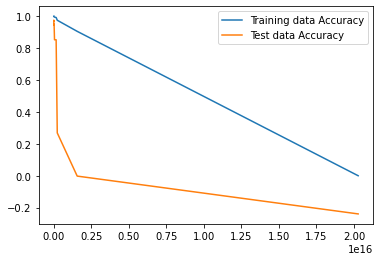

In [67]:
fig,ax = plt.subplots()
ax.plot(ccp_list,train_accuracy_list,label = "Training data Accuracy")
ax.plot(ccp_list,test_accuracy_list,label = "Test data Accuracy")
ax.legend()

In [73]:
DT_Prunned=DecisionTreeRegressor(random_state=43,ccp_alpha=223473087575.10638)
DT_Prunned.fit(x_train,y_train)
print("train_accuracy",DT_Prunned.score(x_train,y_train))
print("test_accuracy",DT_Prunned.score(x_test,y_test))

train_accuracy 0.9999279040529918
test_accuracy 0.9736173889370778


## LR - Model Training and Evaluation

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
lina=LinearRegression()
lina.fit(x_train,y_train)

LinearRegression()

In [69]:
Accuracy_train = lina.score(x_train,y_train)
Accuracy_test = lina.score(x_test,y_test)
print(f"{Accuracy_train=},{Accuracy_test=}")

Accuracy_train=1.0,Accuracy_test=0.9998928980234522


## RF - Model Training and Evaluation

In [70]:
rf=RandomForestRegressor().fit(x_train,y_train)
Accuracy_train = rf.score(x_train,y_train)
Accuracy_test = rf.score(x_test,y_test)
print(f"{Accuracy_train=},{Accuracy_test=}")

Accuracy_train=0.9343592417244491,Accuracy_test=0.9908437718997406


### XGBOOST - TRAINING AND EVALUATION

In [71]:
xg=XGBRegressor().fit(x_train,y_train)
Accuracy_train = xg.score(x_train,y_train)
Accuracy_test = xg.score(x_test,y_test)
print(f"{Accuracy_train=},{Accuracy_test=}")

Accuracy_train=0.9999999861435296,Accuracy_test=0.9920111996450752


#### moving forward with decision tree after pruning model

In [76]:
with open ("Model.pkl","wb") as file:
    pickle.dump(DT_Prunned,file)

In [78]:
project_Data={"columns" :list(x_train.columns)}

In [79]:
with open("project_data.json","w")as file:
    json.dump(project_Data,file)

In [87]:
x_test.tail(10)

,Yearly change,Net change,Density (P/Km²),Migrants (net),Fert. Rate,Med.Age,Urban Pop %,World Share,China,India,...,Wallis & Futuna,Nauru,Saint Barthelemy,Saint Helena,Saint Pierre & Miquelon,Montserrat,Falkland Islands,Niue,Tokelau,Holy See
16,1.09,909452.0,110.0,283922.0,2.1,32.0,76.0,1.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,0.17,2100.0,626.0,0.0,1.4,37.0,41.0,0.02,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,1.86,7275.0,17.0,1200.0,2.3,25.0,46.0,0.01,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161,0.72,6385.0,358.0,-1256.0,2.3,36.0,100.0,0.01,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,1.19,774.0,274.0,-250.0,0.0,0.0,97.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,1.78,84582.0,8.0,-40000.0,4.8,18.0,43.0,0.06,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,-0.66,-126866.0,84.0,-73999.0,1.6,43.0,55.0,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,0.62,608.0,214.0,-200.0,2.5,34.0,56.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,0.06,3.0,50.0,-250.0,0.0,0.0,10.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,-0.06,-6867.0,106.0,-14400.0,1.6,42.0,78.0,0.15,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
y_test.tail(1)

82    11326616.0
Name: Population (2022), dtype: float64

In [86]:
list(x_train.columns[:8])

['Yearly change',
 'Net change',
 'Density (P/Km²)',
 'Migrants (net)',
 'Fert. Rate',
 'Med.Age',
 'Urban Pop %',
 'World Share']